<a href="https://colab.research.google.com/github/Rohit036/sample-repo/blob/master/Practise_ML_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [4]:
loan_data = pd.read_csv('https://raw.githubusercontent.com/Rohit036/sample-repo/master/LoansTrainingSetReduced.csv')
#df.drop('Unnamed: 0',inplace=True,axis=1)
loan_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,728,1.0,Rent,46643.0,DebtConsolidation,777.39,18.0,10.0,12.0,0.0,6762.0,7946.0,0.0,0.0
1,Charged Off,25014,Long Term,733,10.0,Mortgage,81099.0,DebtConsolidation,892.09,26.7,NaN,14.0,0.0,35706.0,77961.0,0.0,0.0
2,Charged Off,16117,Short Term,724,9.0,Mortgage,60438.0,HomeImprovements,1244.02,16.7,32.0,11.0,1.0,11275.0,14815.0,1.0,0.0
3,Charged Off,11716,Short Term,740,3.0,Rent,34171.0,DebtConsolidation,990.94,10.0,NaN,21.0,0.0,7009.0,43533.0,0.0,0.0
4,Charged Off,9789,Long Term,686,10.0,Mortgage,47003.0,HomeImprovements,503.71,16.7,25.0,13.0,1.0,16913.0,19553.0,1.0,0.0


## The hunt for missing values

Questions about processing missing values are integral to any machine learning interview. If you are provided with a dataset with missing values, not addressing them will likely skew your results and lower your model's accuracy.

In this exercise, you'll practice the first pre-processing step by finding and exploring ways to handle missing values using pandas and numpy on a customer loan dataset.

The dataset, which you'll use for many of the exercises in this course, is saved to your workspace as **loan_data**.

This is where you are in the pipeline:

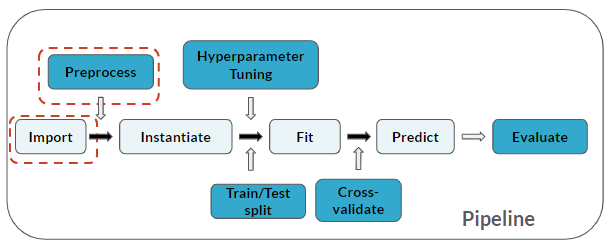

In [5]:
# 1. Print out the features of loan_data along with the number of missing values.
print(loan_data.isna().sum())

Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                       0
Years in current job               0
Home Ownership                     1
Annual Income                      1
Purpose                            1
Monthly Debt                       1
Years of Credit History            1
Months since last delinquent    3543
Number of Open Accounts            1
Number of Credit Problems          1
Current Credit Balance             1
Maximum Open Credit                1
Bankruptcies                      15
Tax Liens                          1
dtype: int64


In [6]:
# 2. Drop the rows with missing values and print the percentage of rows remaining.

# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)

# Print percentage of rows remaining
print(dropNArows.shape[0]/loan_data.shape[0] * 100)

45.678069639584606


In [7]:
# 3. Drop the columns with missing values and print the percentage of columns remaining.

# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of columns remaining
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

29.411764705882355


In [8]:
# 4.1 Impute loan_data's missing values with 0 into loan_data_filled
# 4.2 Compare 'Credit Score' using .describe() before imputation using loan_data and after using loan_data_filled.

# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['Credit Score'].describe())

# Examine 'Credit Score' after
print(loan_data_filled['Credit Score'].describe())

count    6548.000000
mean      714.035889
std        30.239906
min       585.000000
25%       699.000000
50%       723.000000
75%       737.000000
max       751.000000
Name: Credit Score, dtype: float64
count    6548.000000
mean      714.035889
std        30.239906
min       585.000000
25%       699.000000
50%       723.000000
75%       737.000000
max       751.000000
Name: Credit Score, dtype: float64


# Simple imputation
As you saw in the last exercise, deleting data can reduce your dataset by too much. In an interview context, this can lead to biased results of your machine learning model.

A more dynamic way of handling missing values is by imputing them. There are a variety of ways of doing this in python, but in this exercise you will be using the `SimpleImputer()` function from the `sklearn.impute` module on `loan_data`.

You will then use pandas and numpy to convert the imputed dataset into a DataFrame.

Note that 2 steps are now added to the pipeline, **Instantiate** and **Fit**:

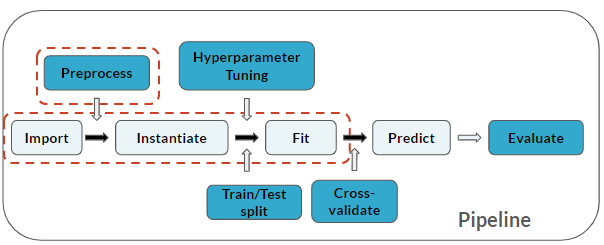

In [0]:
# 1. Subset loan_data's numeric columns and assign them to numeric_cols.

# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=["float64", "int"])


In [0]:
# 2.1 Fit and transform the data.

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

In [0]:
# 3. Convert the returned array back to a DataFrame.

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

In [12]:
loans_imp_meanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           6548 non-null   float64
 1   Credit Score                  6548 non-null   float64
 2   Years in current job          6548 non-null   float64
 3   Annual Income                 6548 non-null   float64
 4   Monthly Debt                  6548 non-null   float64
 5   Years of Credit History       6548 non-null   float64
 6   Months since last delinquent  6548 non-null   float64
 7   Number of Open Accounts       6548 non-null   float64
 8   Number of Credit Problems     6548 non-null   float64
 9   Current Credit Balance        6548 non-null   float64
 10  Maximum Open Credit           6548 non-null   float64
 11  Bankruptcies                  6548 non-null   float64
 12  Tax Liens                     6548 non-null   float64
dtypes: 

# Iterative imputation
In the previous exercise, you derived mean imputations for missing values of loan_data. However, in a machine learning interview, you will probably be asked about more dynamic imputation techniques that rely on other features in the dataset.

In this exercise, you'll practice a machine-learning based approach by imputing missing values as a function of remaining features using `IterativeImputer()` from `sklearn.impute`. This is a multivariate imputer that estimates each feature from all of the others in a 'round-robin' fashion.

Note that this function is considered experimental, so please read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) for more information.

You're at the same place in the Pipeline:

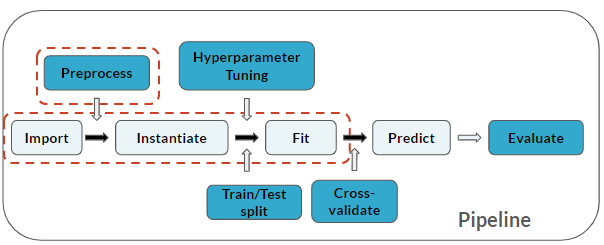

In [13]:
# 1. Subset loan_data's numeric columns and assign them to numeric_cols.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# 2.1 Instantiate an iterative imputation object with 5 iterations and posterior sampling enabled.
# 2.2 Fit and transform the data.

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# 3.1 Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

# 4.1 Print info()
loans_imp_iterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           6548 non-null   float64
 1   Credit Score                  6548 non-null   float64
 2   Years in current job          6548 non-null   float64
 3   Annual Income                 6548 non-null   float64
 4   Monthly Debt                  6548 non-null   float64
 5   Years of Credit History       6548 non-null   float64
 6   Months since last delinquent  6548 non-null   float64
 7   Number of Open Accounts       6548 non-null   float64
 8   Number of Credit Problems     6548 non-null   float64
 9   Current Credit Balance        6548 non-null   float64
 10  Maximum Open Credit           6548 non-null   float64
 11  Bankruptcies                  6548 non-null   float64
 12  Tax Liens                     6548 non-null   float64
dtypes: 

# Data Distribution and Transformations

---



#Train/test distributions
In a machine learning interview, you will most certainly work with training data and test data. As discussed earlier, poor model performance can result if the distributions of training and test datasets differ.

In this exercise, you'll use functions from `sklearn.model_selection` as well as `seaborn` and` matplotlib.pyplot` to split `loan_data` into a training set and a test set, as well as visualize their distributions to spot any discrepancies.

Note that `seaborn` and `matplotlib.pyplot` have already been imported to your workspace and aliased as `sns` and `plt`, respectively.

The pipeline now includes Train/Test split:

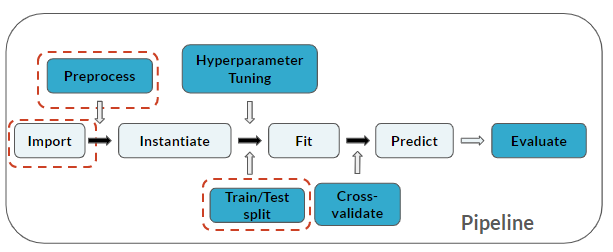

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


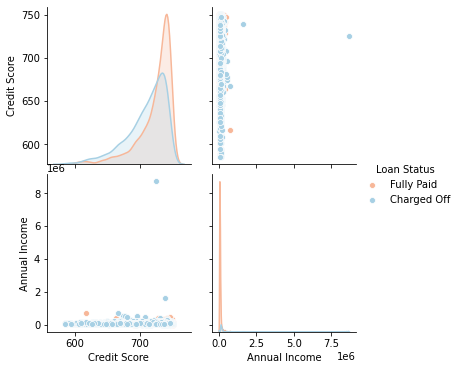

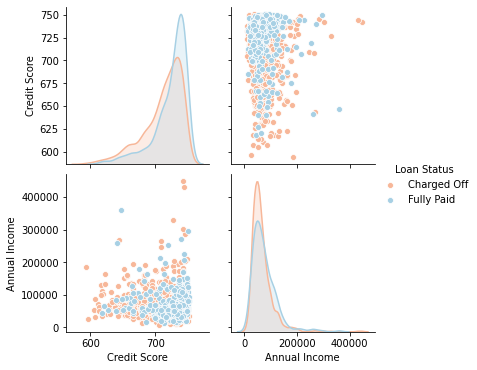

In [14]:
# 1. Subset loan_data to only the Credit Score and Annual Income features, and the target variable Loan Status in that order.
# 2. Create an 80/20 split of loan_data and assign it to loan_data_subset.
# 3. Create pairplots of trainingSet and testSet (in that order) setting the hue argument to the target variable Loan Status.

from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
#plt.figure(figsize=(20,20))
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.2, random_state=123)

# Examine pairplots
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()


# Log and power transformations
In the last exercise, you compared the distributions of a training set and test set of `loan_data`. This is especially poignant in a machine learning interview because the distribution observed dictates whether or not you need to use techniques which nudge your feature distributions toward a normal distribution so that normality assumptions are not violated.

In this exercise, you will be using the log and power transformation from the scipy.stats module on the `Years of Credit History` feature of `loan_data` along with the `distplot()` function from `seaborn`, which plots both its distribution and kernel density estimation.

All relevant packages have been imported for you.

Here is where you are in the pipeline:

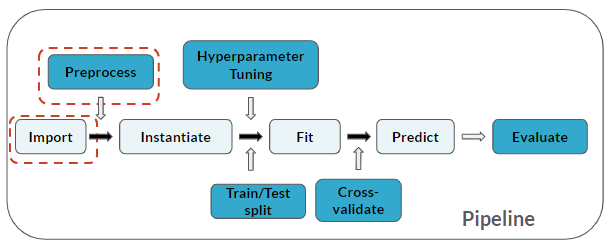



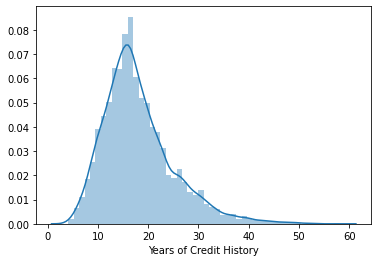

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


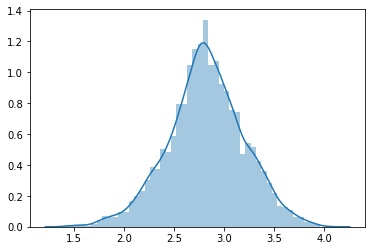

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


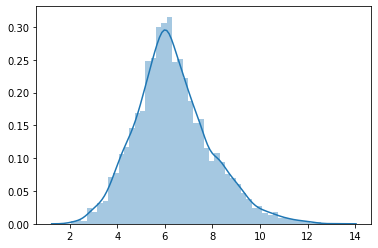

In [15]:
# 1. Subset loan_data for 'Years of Credit History' and plot its distribution and kernel density estimation (kde) using distplot().
# 2. Apply a log transformation using the Box-Cox transformation to cr_yrs and plot its distribution and kde.
# 3. Transform 'Years of Credit History' using the Box-Cox square-root argument and plot its distribution and kde.

# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs)
plt.show()

import scipy

# Box-Cox transformation
cr_yrs_log = scipy.stats.boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

# Square root transform
cr_yrs_sqrt = scipy.stats.boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_sqrt)
plt.show()

# Outlier detection
A very important aspect of preprocessing your data correctly is outlier detection. In machine learning interview questions, a common question is how to locate and process outliers. An easy way to detect outliers is by visualizing them graphically.

After finding and imputing missing data, finding and figuring out what to do about outliers is another necessary preprocessing step.

There's a variety of packages that let you visualize outliers, but in this exercise, you will be using `seaborn` to plot univariate and multivariate boxplots of selected columns of `loan_data`.

All relevant packages have been imported for you.

Where are you with the pipeline?

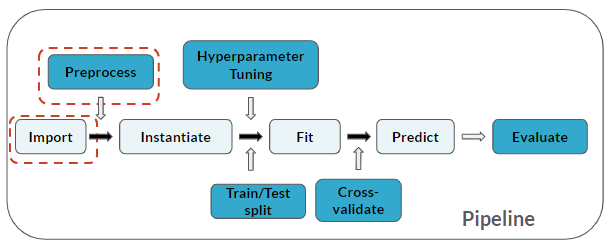

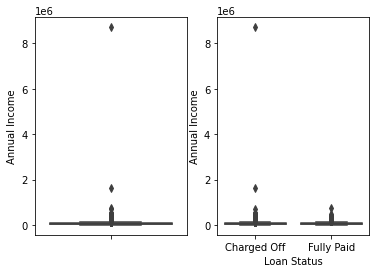

In [16]:
# Create a univariate boxplot using the feature Annual Income from loan_data.
# Create a multivariate boxplot conditioned on Loan Status using the feature Annual Income from loan_data.
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

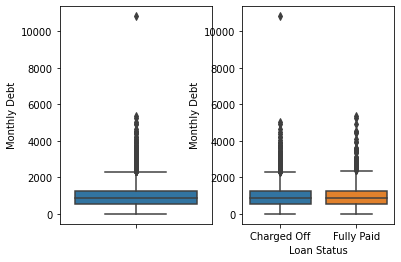

In [17]:
# Create a univariate boxplot using the feature Monthly Debt from loan_data.
# Create a multivariate boxplot conditioned on Loan Status using the feature Monthly Debt from loan_data.
# Multivariate boxplot
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data, ax=ax[1])
plt.show()

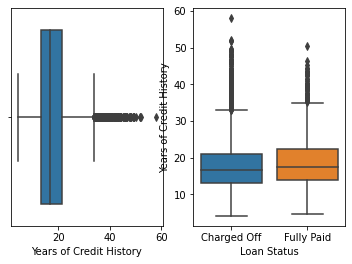

In [18]:
# Create a univariate boxplot using the feature Years of Credit History from loan_data.
# Create a multivariate boxplot conditioned on Loan Status using the feature Years of Credit History from loan_data.

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(x=loan_data['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data, ax=ax[1])
plt.show()

# Handling outliers
In the last exercise, you learned how visualizing outliers could come in handy in a machine learning interview. Another convenient way for handling outliers is by calculating the Z-score which gives a threshold for outliers approximately +/-3 standard deviations away from the mean.

In this exercise, you will use the `scipy.stats` module to calculate the Z-score using the `stats.zscore()` function and the `mstats.winsorize()` function to replace outliers using a technique called Winsorizing.

Recall from the video lesson that those points above and/or below 1.5 times the IQR should be suspected as possible outliers. For the last step in this exercise, that value is 2120.

The relevant packages have been imported for you, and `loan_data`'s numeric and categorical columns have been subset and saved as `numeric_cols` and `categoric_cols`, respectively.

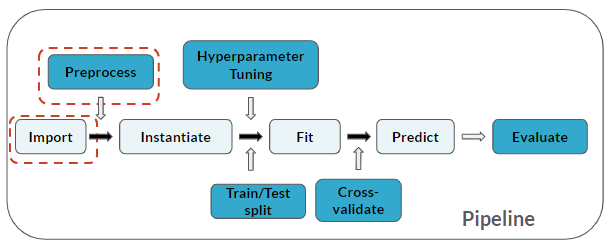

In [58]:
# Create an index of rows to keep for absolute z-scores less than 3 on the numeric columns and use it to index and concatenate subsets.

from scipy import stats

numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols, categoric_cols], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

Current Loan Amount             11481.870495
Credit Score                      714.035889
Years in current job                5.674633
Years of Credit History            18.049099
Months since last delinquent       35.320696
Number of Open Accounts            11.271075
Number of Credit Problems           0.167379
Current Credit Balance          15596.711820
Maximum Open Credit             30700.339340
Bankruptcies                        0.113741
Tax Liens                           0.033445
Loan Status                         0.770312
dti_ratio                          18.200396
dtype: float64
Current Loan Amount             10107.500000
Credit Score                      723.000000
Years in current job                6.000000
Years of Credit History            16.700000
Months since last delinquent       35.637556
Number of Open Accounts            10.500000
Number of Credit Problems           0.000000
Current Credit Balance          11307.500000
Maximum Open Credit             20650.00

In [20]:
# Winsorize 'Monthly Debt' with 5% upper and lower limits and print the mean, median and max before and after.
from scipy.stats import mstats
# Print: before winsorize
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

974.1917824957997
860.54
10831.65
Monthly Debt    947.073991
dtype: float64
Monthly Debt    860.785
dtype: float64
Monthly Debt    2131.02
dtype: float64


In [21]:
# Find the median of the values of Monthly Debt that are lower than 2120 and replace outliers with it.

# Print: before replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

# Print: after replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

974.1917824957997
860.54
10831.65
876.9935833206121
827.73
2116.37


# Z-score standardization
In the last exercise, you calculated the Z-score to address outliers. In a machine learning interview, another question might be where else Z-scores are used. They are often used for scaling your data prior to creating a model.

In this exercise you'll use a function from `sklearn.preprocessing` that was introduced in the video lesson to standardize the numeric feature columns in the `loan_data` dataset. Recall that this scales the data so that it has a mean of 0 and standard deviation of 1.

The `sklearn.preprocessing` module has already been imported for you.

Pipeline snapshot:

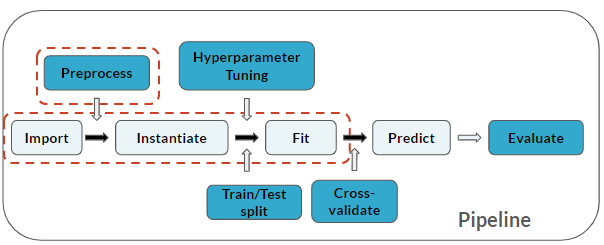

In [22]:
# Create a subset of the numeric and categorical columns in loan_data.

numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate a standard scaler object and assign it to scaler.

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# Fit and transform the relevant columns with a call to the appropriate method, then convert the returned object back to a DataFrame.
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([categoric_cols, numeric_cols_scaledDF], axis=1)
print(final_DF.head())

   Loan Status        Term  ... Bankruptcies Tax Liens
0  Charged Off  Short Term  ...    -0.326538  -0.12157
1  Charged Off   Long Term  ...    -0.326538  -0.12157
2  Charged Off  Short Term  ...     2.544621  -0.12157
3  Charged Off  Short Term  ...    -0.326538  -0.12157
4  Charged Off   Long Term  ...     2.544621  -0.12157

[5 rows x 17 columns]


# Supervised Learning

---



---



In [23]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/Rohit036/sample-repo/master/diabetes.csv", )
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [24]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


# Filter and wrapper methods
Questions about reducing the dimensionality of a dataset are highly common in machine learning interviews. One way to reduce the dimensionality of a dataset is by only selecting relevant features in your dataset.

Here you'll practice a filter method on the `diabetes` DataFrame followed by 2 different styles of wrapper methods that include cross-validation. You will be using pandas, matplotlib.pyplot and seaborn to visualize correlations, process your data and apply feature selection techniques to your dataset.

The feature matrix with the dropped target variable column (progression) is loaded as X, while the target variable is loaded as y.

Note that pandas, matplotlib.pyplot, and seaborn have already been imported to your workspace and aliased as pd, plt, and sns respectively.

Notice you've added a Cross-validate step to your pipeline (which applies to the last 3 steps):

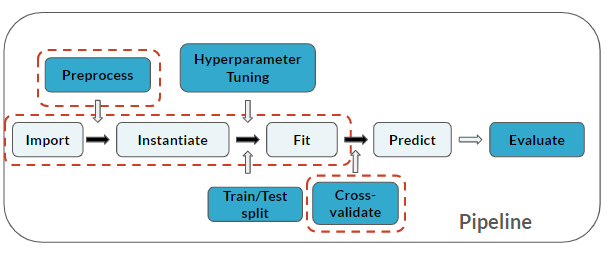

                  age       sex       bmi  ...        s5        s6  progression
age          1.000000  0.173737  0.185085  ...  0.270777  0.301731     0.187889
sex          0.173737  1.000000  0.088161  ...  0.149918  0.208133     0.043062
bmi          0.185085  0.088161  1.000000  ...  0.446159  0.388680     0.586450
bp           0.335427  0.241013  0.395415  ...  0.393478  0.390429     0.441484
s1           0.260061  0.035277  0.249777  ...  0.515501  0.325717     0.212022
s2           0.219243  0.142637  0.261170  ...  0.318353  0.290600     0.174054
s3          -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697    -0.394789
s4           0.203841  0.332115  0.413807  ...  0.617857  0.417212     0.430453
s5           0.270777  0.149918  0.446159  ...  1.000000  0.464670     0.565883
s6           0.301731  0.208133  0.388680  ...  0.464670  1.000000     0.382483
progression  0.187889  0.043062  0.586450  ...  0.565883  0.382483     1.000000

[11 rows x 11 columns]


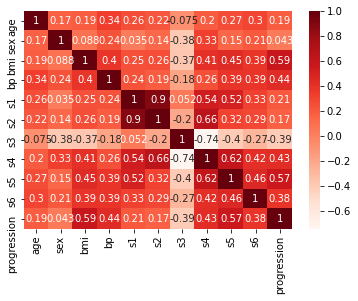

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [25]:
# Create correlation matrix with diabetes and a heatmap, then subset the features which have greater than 50% correlation.


# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

In [26]:
# Instantiate a linear kernel SVR estimator and a feature selector with 5 cross-validations, fit to features and target.

# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

X = diabetes.iloc[:,0:10]
y = diabetes.iloc[:,10]

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [27]:
# Drop the unimportant column found in step 2 from X and instantiate a LarsCV object and fit it to your data.

# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = X.drop("sex", axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

0.4982900996498095
0.05226862285159132


# Feature selection through feature importance
In the last exercise, you practiced how filter and wrapper methods could be of use when selecting features in machine learning, and in machine learning interviews. In this exercise, you'll practice feature selection methods using the built-in feature importance in tree-based machine learning algorithms on the diabetes DataFrame.

Although there is only time and space to practice with a few of them on DataCamp, there is some excellent documentation available from the scikit-learn website that goes over several other ways to select features.

The feature matrix and target array are saved to your workspace as X and y, respectively.

Recall that feature selection is considered a pre-processing step:

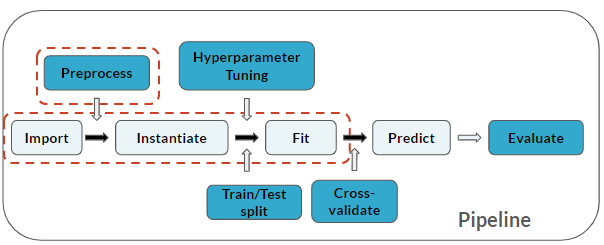

In [28]:
# Import the correct function to instantiate a Random Forest regression model.
# Fit the model and print feature importance.

# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.39961579 0.03085607 0.         0.00128948 0.00700339
 0.00417891 0.53899467 0.01806168]


In [29]:
# Import the correct function to instantiate an Extra Tree regression model.
# Fit the model and print feature importance.

# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.06061161 0.25464454 0.11894594 0.04939249 0.05438643 0.07080741
 0.07704201 0.23227718 0.08189238]


Amazing! Though both the Random Forest and Extra Trees ultimately methods have similar results, the output from the Random Forest are a bit more clear. Either way, one of the simplest ways to have an algorithm select features for you before training your machine learning models are tree-based methods such as these. Now let's learn the ins-and-outs of regularization methods in the next lesson...

# Lasso regularization
In the previous lesson, you covered an important aspect of machine learning interview questions by practicing various feature selection techniques.

In this exercise, you will build on your knowledge of feature selection and perform all the steps in the machine learning pipeline by trying out Lasso Regularization.

All relevant packages have been imported for you, as well as the feature matrix X and target variable y. You've come a long way!

You're now performing all of the steps in the machine learning pipeline - importing modules, preprocessing steps, instantiating estimators, train/test split, cross validating, tuning hyperparameters, then fitting, predicting and evaluating. You've come a long way!

In [30]:
# Import the functions needed for regular and cross-validated Lasso Regression, as well as mean squared error.
# Split your data into training and testing data with 30% test size.
# Instantiate a cross-validated lasso regression model setting 10-fold cross-validation and 10000 iterations, then fit it to your training data.
# Instantiate a lasso estimator passing the best alpha value from lasso_cv.
# Fit the model and print the mean squared error of your predictions.

# Import modules
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

2977.4320945626737


Awesome! Keep in mind the MSE of 2977, which is the average error using cross-validated lasso regression. Let's see if it can be improved or not by practicing cross-validated ridge regression!

# Ridge regularization
In the last exercise you practiced performing lasso regularization. If you're asked about regularization techniques in a machine learning interview, know what differentiates the 2 norms. Lasso uses the L1 norm corresponding to the penalty parameter and the absolute value of the coefficients. Ridge regression performs L2 regularization, also known as L2-norm, which adds a penalty term to ordinary least squares using the penalty parameter and the sum of the squared coefficients.

For this exercise, you'll practice regularization with Ridge on the diabetes DataFrame. The feature matrix and target array are saved to your workspace as X and y, respectively.

Already imported for you are mean_squared_error from sklearn.metrics and train_test_split from sklearn.model_selection.

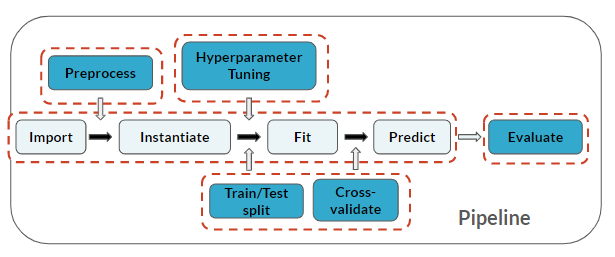

In [31]:
# Import the functions needed for regular and cross-validated Ridge Regression, as well as mean squared error.
# Split your data into training and testing data with 30% test size.
# Instantiate a cross-validated ridge regression model object setting alphas to a list of 13 log scale values from -6 to 6 using np.logspace().
# Fit it to your training data.
# Instantiate a ridge estimator passing the best alpha value from ridge_cv.
# Fit the model and print the mean squared error of your predictions.

# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

3037.3833325134415


# Logistic regression baseline classifier
In the last 2 lessons, you learned how valuable feature selection is in the context of machine learning interviews. Another set of common questions you should expect in a machine learning interview pertain to feature engineering, and how they help improve model performance.

In this exercise, you'll engineer a new feature on the loan_data dataset from Chapter 1, compare the accuracy score of Logistic Regression models on the dataset before and after feature engineering by comparing test labels with the predicted values of the target variable Loan Status.

All relevant packages have been imported for you: matplotlib.pyplot as plt, seaborn as sns, LogisticRegression from sklearn.linear_model, train_test_split from sklearn.model_selection, and accuracy_score from sklearn.metrics.

Feature engineering is considered a pre-processing step before modeling:

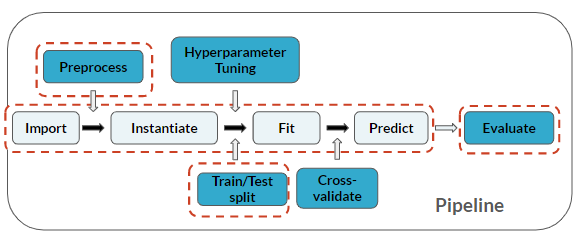

In [32]:
loan_data = pd.read_csv("https://raw.githubusercontent.com/Rohit036/sample-repo/master/loan_logistic.csv")
loan_data = loan_data.loc[:, ~loan_data.columns.str.contains('^Unnamed')]
loan_data.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,12232,728,1.0,46643,777.39,18.0,10.000000,12,0,6762,7946,0.0,0,Charged Off
1,25014,733,10.0,81099,892.09,26.7,34.930232,14,0,35706,77961,0.0,0,Charged Off
2,16117,724,9.0,60438,1244.02,16.7,32.000000,11,1,11275,14815,1.0,0,Charged Off
3,11716,740,3.0,34171,990.94,10.0,37.741130,21,0,7009,43533,0.0,0,Charged Off
4,9789,686,10.0,47003,503.71,16.7,25.000000,13,1,16913,19553,1.0,0,Charged Off


In [44]:
# Fit and predict a Logistic Regression on loan_data with the target variable Loan Status as y and evaluate the trained model's accuracy score.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
# Create X matrix and y array
X = loan_data.drop("Loan Status", axis=1)
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train = preprocessing.scale(X_train)
# Instantiate
logistic = LogisticRegression()

# Fit
logistic.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test)))

0.9989821882951654


In [0]:
# Convert Annual Income to monthly, and derive the ratio of Monthly Debt to monthly_income and store it in dti_ratio.

monthly_income = loan_data["Annual Income"]/12

# Make engineered feature, remove features used
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

In [48]:
# Convert the target variable to numerical values and replace categorical features with dummy values.

# Replace target variable levels
loan_data["Loan Status"] = loan_data["Loan Status"].replace({'Fully Paid': 0, 
                                            'Charged Off': 1})

# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data)

# Print
print(loan_data.head())

   Current Loan Amount  Credit Score  ...  Loan Status  dti_ratio
0                12232           728  ...            1  20.000172
1                25014           733  ...            1  13.200015
2                16117           724  ...            1  24.700089
3                11716           740  ...            1  34.799333
4                 9789           686  ...            1  12.859860

[5 rows x 13 columns]


# Bootstrap aggregation (bagging)
In the last lesson, you got a small taste of classification models by applying logistic regression on data with engineered features. In machine learning interviews, it's sometimes worthwhile to know about ensemble models since they combine weak learners to create a strong learner that improves model accuracy.

In this exercise, you will start off by applying a bagging classifier which uses a sampling technique, with replacement, to maintain randomness and reduce overfitting. You will be using functions from the sklearn.ensemble module which you saw in the video exercise.

All relevant packages have been imported for you: `pandas as pd`, `train_test_split from sklearn.model_selection`, `accuracy_score from sklearn.linear_model`, `LogisticRegression` `from sklearn.linear_model`, and `BaggingClassifier` and `AdaBoostClassifier` from `sklearn.ensemble`.

The `loan_data` DataFrame is already split into X_train, X_test, y_train and y_test.

# Principal component analysis
In the last 2 chapters, you saw various instances about how to reduce the dimensionality of your dataset including regularization and feature selection. It is important to be able to explain different aspects of reducing dimensionality in a machine learning interview. Large datasets take a long time to compute, and noise in your data can bias your results.

One way of reducing dimensionality is principal component analysis. It's an effective way of reducing the size of the data by creating new features that preserve the most useful information on a dataset while at the same time removing multicollinearity. In this exercise, you will be using the sklearn.decomposition module to perform PCA on the features of the diabetes dataset while isolating the target variable progression.

This is where you are in the pipeline:

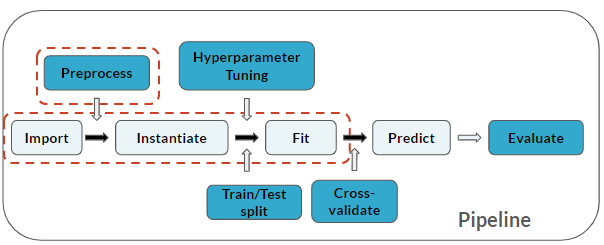

In [0]:
# Import the relevant module to perform PCA.
# Create a feature matrix X and target array y with progression from the diabetes dataset.

diabetes = pd.read_csv("https://raw.githubusercontent.com/Rohit036/sample-repo/master/diabetes.csv")

# Import module
from sklearn.decomposition import PCA

# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

In [53]:
# Instantiate a principal component analysis object to perform linear dimensionality reduction that returns 3 components.
# Fit and transform the feature matrix.
# Print the ratio of variance explained.

# PCA
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


In [54]:
# Import module
from sklearn.decomposition import TruncatedSVD

# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]
